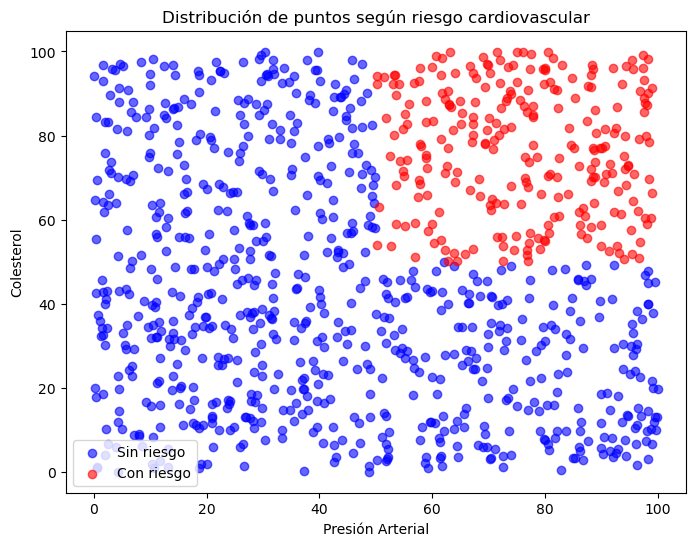

In [1]:
# Parte A: Perceptrón multicapa
# Paso 1: Generamos una gran cantidad de puntos aleatorios (presión arterial y colesterol)

import numpy as np
import matplotlib.pyplot as plt

# Generamos 1000 puntos aleatorios con valores de presión arterial y colesterol
np.random.seed(0)
X = np.random.rand(1000, 2) * 100  # Presión arterial y colesterol entre 0 y 100

# Etiquetamos riesgo cardiovascular si presión arterial > 50 y colesterol > 50
y = (X[:, 0] > 50) & (X[:, 1] > 50)

# Creamos la gráfica
plt.figure(figsize=(8, 6))

# Puntos sin riesgo (0)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Sin riesgo', alpha=0.6)

# Puntos con riesgo (1)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Con riesgo', alpha=0.6)

# Etiquetas de los ejes
plt.xlabel('Presión Arterial')
plt.ylabel('Colesterol')

# Título de la gráfica
plt.title('Distribución de puntos según riesgo cardiovascular')

# Leyenda
plt.legend()

# Mostramos la gráfica
plt.show()

En este paso, se generan 1000 puntos aleatorios que representan valores de presión arterial y colesterol, ambos en un rango de 0 a 100. Estos puntos se etiquetan como de riesgo cardiovascular (1) si tanto la presión arterial como el colesterol son mayores que 50; de lo contrario, se etiquetan como sin riesgo (0).

Se crea una gráfica de dispersión donde los puntos se colorean según su etiqueta: azul para los puntos sin riesgo y rojo para los puntos con riesgo.

Esta gráfica permite visualizar la distribución de los datos y cómo se separan las dos clases (con y sin riesgo) en el espacio de características (presión arterial y colesterol).

Este paso es fundamental para entender la estructura de los datos antes de aplicar cualquier modelo de aprendizaje automático. La separación visual de las clases nos indica que un modelo de clasificación debería ser capaz de aprender a distinguir entre las dos categorías.

In [2]:
# Paso 2: Dividir el conjunto de datos en entrenamiento y evaluación

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

En este paso, dividimos el conjunto de datos en dos subconjuntos: entrenamiento y evaluación (o prueba). Esto se hace utilizando la función train_test_split de la librería Scikit-learn.

Utilizamos un 80% de los datos para entrenamiento (X_train, y_train) y un 20% para evaluación (X_test, y_test). Esto se especifica con el parámetro test_size=0.2.

La división es crucial para entrenar el modelo con una parte de los datos y evaluar su rendimiento con datos que no ha visto durante el entrenamiento y se realiza de manera aleatoria, lo que asegura que los datos estén bien mezclados y no haya sesgos en la selección. Esto ayuda a medir la capacidad de generalización del modelo.

In [3]:
# Paso 3: Entrenamos una red neuronal con el conjunto de entrenamiento:

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamos el modelo
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5, 2), random_state=1, max_iter=1000)
clf.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=1000, random_state=1,
              solver='lbfgs')

Utilizamos StandardScaler para escalar los datos. Esto es importante porque las redes neuronales funcionan mejor cuando los datos están normalizados (media = 0, desviación estándar = 1).

Usamos MLPClassifier de Scikit-learn, que es una red neuronal para problemas de clasificación.

Estos son los hiperparámetros que vamos a utilizar:

- solver='lbfgs': Un algoritmo de optimización eficiente para problemas pequeños.
- hidden_layer_sizes=(5, 2): La red tiene dos capas ocultas, una con 5 neuronas y otra con 2.
- random_state=1: Fija la semilla aleatoria para reproducibilidad.
- max_iter=1000: Número máximo de iteraciones para el entrenamiento.

Y por último usamos clf.fit() para entrenar el modelo con los datos de entrenamiento escalados (X_train_scaled) y sus etiquetas (y_train).

In [4]:
# Paso 4: Aplicamos el modelo sobre el conjunto de evaluación

y_pred = clf.predict(X_test_scaled)

Utilizamos el modelo ya entrenado para hacer predicciones sobre el conjunto de evaluación (X_test_scaled).

El objetivo eer cómo se comporta el modelo con datos que no ha visto durante el entrenamiento. Almacenamos el resultado en y_pred, que contiene las predicciones del modelo para cada punto en el conjunto de prueba.

Esto permite evaluar la capacidad del modelo para generalizar y clasificar correctamente nuevos datos.

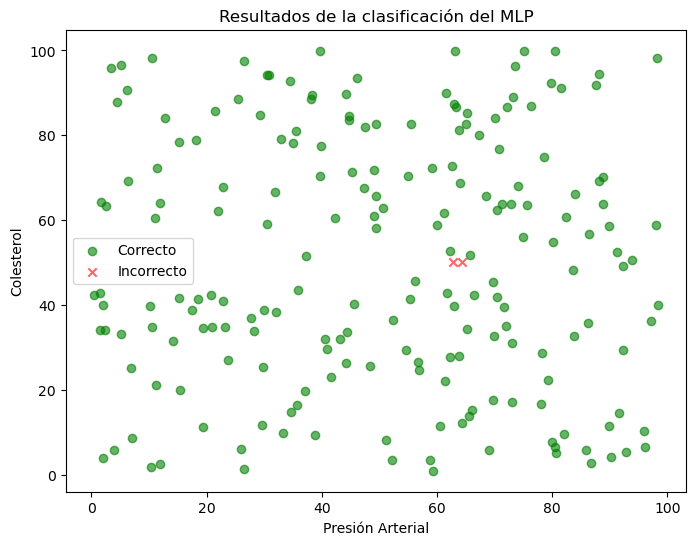

In [5]:
# Paso 5: Mostramos los resultados aplicados sobre el conjunto de evaluación

# Crear la gráfica
plt.figure(figsize=(8, 6))

# Graficar los puntos correctamente clasificados
correct = y_test == y_pred
plt.scatter(X_test[correct][:, 0], X_test[correct][:, 1], color='green', label='Correcto', marker='o', alpha=0.6)

# Graficar los puntos incorrectamente clasificados
incorrect = y_test != y_pred
plt.scatter(X_test[incorrect][:, 0], X_test[incorrect][:, 1], color='red', label='Incorrecto', marker='x', alpha=0.6)

# Etiquetas y leyenda
plt.xlabel('Presión Arterial')
plt.ylabel('Colesterol')
plt.title('Resultados de la clasificación del MLP')
plt.legend()

# Mostrar la gráfica
plt.show()

Podemos observar que parece que el modelo en principio funciona bastante bien, ya que no observamos un gran número de errores.

De todas formas, vamos a sacar métricas para poder evaluar correctamente esta clasificación.

In [6]:
# Paso 6: Usamos las métricas precisión y recall estudiadas en clase para evaluar la clasificación

from sklearn.metrics import precision_score, recall_score

# Calcular precisión y recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Precisión: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Precisión: 1.00
Recall: 0.96


Las precisión nos indica cómo de confiables son las predicciones positivas del modelo, y el recall cuántos casos positivos reales capturó. Estas métricas ayudan a entender el equilibrio entre los errores del modelo (falsos positivos y falsos negativos).

Podemos observar que los resultados son bastante positivos.

In [7]:
# Paso 7: Mejoramos la precisión de la red neuronal cambiando algunos parámetros

# Para evitar el overfitting y mejorar la precisión, podemos probar diferentes configuraciones de la red neuronal. 
# Vamos a probar al menos dos configuraciones distintas, cambiando parámetros como el número de capas ocultas, el número de 
# neuronas, el solver, la tasa de aprendizaje, etc.




# Configuración 1: Más neuronas y capas
clf_1 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10, 5), random_state=1, max_iter=1000)
clf_1.fit(X_train_scaled, y_train)
y_pred_1 = clf_1.predict(X_test_scaled)

# Calcular precisión y recall para la configuración 1
precision_1 = precision_score(y_test, y_pred_1)
recall_1 = recall_score(y_test, y_pred_1)

print(f'Configuración 1 - Precisión: {precision_1:.2f}')
print(f'Configuración 1 - Recall: {recall_1:.2f}')


# Configuración 2: Solver 'adam' y tasa de aprendizaje adaptativa

# Adam es un solver que adapta la tasa de aprendizaje durante el entrenamiento, lo que lo hace muy eficiente y
#robusto para una amplia variedad de problemas.


# La tasa de aprendizaje adaptativa significa que no es fija, sino que se ajusta automáticamente durante el entrenamiento.
# Si el modelo detecta que no está mejorando (por ejemplo, si la pérdida no disminuye), reduce la tasa de aprendizaje para ajustar
# los pesos de manera más precisa. Esto es útil para evitar problemas como el sobreajuste (overfitting) y mejora la convergencia del modelo.

clf_2 = MLPClassifier(solver='adam', hidden_layer_sizes=(5, 2), random_state=1, max_iter=1000, learning_rate='adaptive')
clf_2.fit(X_train_scaled, y_train)
y_pred_2 = clf_2.predict(X_test_scaled)

# Calcular precisión y recall para la configuración 2
precision_2 = precision_score(y_test, y_pred_2)
recall_2 = recall_score(y_test, y_pred_2)

print(f'Configuración 2 - Precisión: {precision_2:.2f}')
print(f'Configuración 2 - Recall: {recall_2:.2f}')

Configuración 1 - Precisión: 1.00
Configuración 1 - Recall: 1.00
Configuración 2 - Precisión: 1.00
Configuración 2 - Recall: 0.94





Configuración 1: Más neuronas y capas


- Se aumenta el número de neuronas y capas: hidden_layer_sizes=(10, 5) (dos capas ocultas con 10 y 5 neuronas respectivamente).
- Se mantiene el solver lbfgs.

Objetivo: Aumentar la capacidad del modelo para capturar patrones más complejos en los datos.



Configuración 2: Solver 'adam' y tasa de aprendizaje adaptativa

- Se usa el solver adam, que es más eficiente y robusto para problemas grandes.
- Se activa la tasa de aprendizaje adaptativa (learning_rate='adaptive'), que ajusta automáticamente la tasa de aprendizaje durante el entrenamiento.

Objetivo: Mejorar la convergencia del modelo y evitar el sobreajuste (overfitting).


En resumen, con la configuración 1 buscamos aumentar la complejidad del modelo (más neuronas y capas), mientras que con la configuración 2 buscamos la mejora la eficiencia del entrenamiento (solver 'adam' y tasa de aprendizaje adaptativa).


Parece que la que mejor funciona es la configuración 1, es decir, la que teníamos antes pero con más capas y neuronas.

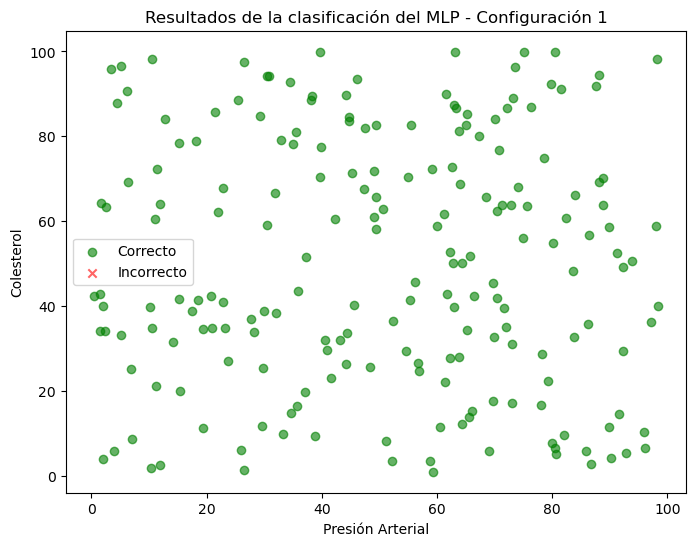

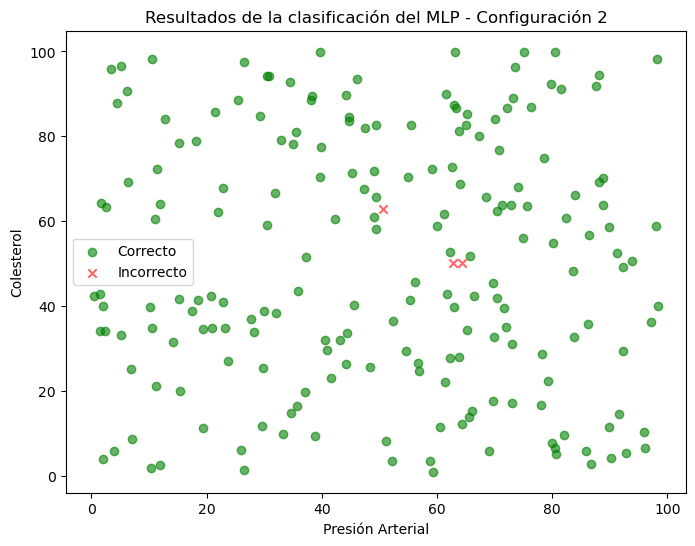

In [8]:
# Paso 8: Calculamos la precisión para cada configuración y dibujamos las gráficas

# Gráfica para la configuración 1
plt.figure(figsize=(8, 6))
correct_1 = y_test == y_pred_1
incorrect_1 = y_test != y_pred_1

plt.scatter(X_test[correct_1][:, 0], X_test[correct_1][:, 1], color='green', label='Correcto', marker='o', alpha=0.6)
plt.scatter(X_test[incorrect_1][:, 0], X_test[incorrect_1][:, 1], color='red', label='Incorrecto', marker='x', alpha=0.6)

plt.xlabel('Presión Arterial')
plt.ylabel('Colesterol')
plt.title('Resultados de la clasificación del MLP - Configuración 1')
plt.legend()
plt.show()

# Gráfica para la configuración 2
plt.figure(figsize=(8, 6))
correct_2 = y_test == y_pred_2
incorrect_2 = y_test != y_pred_2

plt.scatter(X_test[correct_2][:, 0], X_test[correct_2][:, 1], color='green', label='Correcto', marker='o', alpha=0.6)
plt.scatter(X_test[incorrect_2][:, 0], X_test[incorrect_2][:, 1], color='red', label='Incorrecto', marker='x', alpha=0.6)

plt.xlabel('Presión Arterial')
plt.ylabel('Colesterol')
plt.title('Resultados de la clasificación del MLP - Configuración 2')
plt.legend()
plt.show()

Aquí observamos la eficiencia de la primera configuración
y que en la segunda configuración tiene un poco de errores

In [9]:
# Paso 9: Discutimos los resultados y determinamos la mejor configuración

# Comparación de las configuraciones
print(f'Configuración 1 - Precisión: {precision_1:.2f}, Recall: {recall_1:.2f}')
print(f'Configuración 2 - Precisión: {precision_2:.2f}, Recall: {recall_2:.2f}')

if precision_1 > precision_2 and recall_1 > recall_2:
    print("La configuración 1 es mejor.")
elif precision_2 > precision_1 and recall_2 > recall_1:
    print("La configuración 2 es mejor.")
else:
    print("Ambas configuraciones tienen resultados similares.")

Configuración 1 - Precisión: 1.00, Recall: 1.00
Configuración 2 - Precisión: 1.00, Recall: 0.94
Ambas configuraciones tienen resultados similares.





La configuración 1 logra un rendimiento perfecto tanto en precisión como en recall. Esto indica que el modelo clasificó todos los puntos correctamente, sin errores.

La configuración 2 aunque tiene una precisión perfecta, su recall es ligeramente inferior (94%). Esto significa que el modelo no identificó correctamente el 6% de los casos positivos reales.


La configuración 2 parece tener un rendimiento inferior principalmente por las siguientes razones:

- Menor complejidad: Tiene menos neuronas y capas, lo que limita su capacidad para capturar patrones complejos.

- Solver 'adam': Aunque es eficiente, puede converger demasiado rápido y quedar atrapado en un mínimo local subóptimo.

- Tasa de aprendizaje adaptativa: Si la tasa de aprendizaje se reduce demasiado rápido, el modelo puede no ajustarse adecuadamente a los datos.


Aunque también tenemos que tener en cuenta que la configuración 1, al tener más neuronas y capas, podría estar más cerca del sobreajuste (overfitting), pero en este caso, los datos son relativamente simples y el modelo generaliza bien. Sin embargo, la configuración 2, al ser más simple, podría estar subajustando (underfitting), es decir, no captura todos los patrones de los datos, lo que explica el recall más bajo.

El solver adam suele funcionar mejor con un batch size adecuado y un número suficiente de epochs. Si el batch size es demasiado pequeño o el número de epochs insuficiente, el modelo podría no converger completamente.

Por lo que en este caso, vamos a quedarnos con la configuración 1 porque nos ofrece un rendimiento perfecto, pero deberíamos tener muy en cuenta también a la configuración 2 para muestras más grandes por ejemplo.